## #1 Outliers - Rejection Algorithm

* Fit a regression, take 10% of points that have the largest residuals, relative to your regression
* Remove them
* Re-train

In [11]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('agg')
import pandas as pd
import random
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
"""
convert dos linefeeds (crlf) to unix (lf)
usage: dos2unix.py 
"""
original = "files/practice_outliers_net_worths.pkl"
destination = "files/practice_outliers_net_worths_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 100 bytes.


In [5]:
### load up some practice data with outliers in it
ages = pickle.load( open("files/practice_outliers_ages_unix.pkl", "rb") )
net_worths = pickle.load( open("files/practice_outliers_net_worths_unix.pkl", "rb") )

In [7]:
len(ages), len(net_worths)

(100, 100)

In [8]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

### #1 Train Regression with Outliers

In [12]:
# create training and testin set
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [15]:
def ml_regression(ages_train, net_worths_train):
    
    # create the classifier
    reg = LinearRegression()
    # fit the data
    reg.fit(ages_train, net_worths_train)
    
    return reg

In [17]:
reg = ml_regression(ages_train, net_worths_train)

### #2 Make Predictions

In [19]:
pred = reg.predict(ages_test)

### #3 Vizualize the Classifier

In [20]:
def view_regression(ages_train, net_worths_train, ages_test, net_worths_test, pred):
    plt.clf()
    plt.scatter(ages_train, net_worths_train, color="b", label="train data")
    plt.scatter(ages_test, net_worths_test, color="r", label="test data")
    plt.plot(ages_test, pred, color="black")
    plt.legend(loc=2)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show();

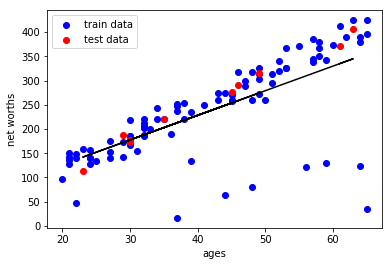

In [21]:
view_regression(ages_train, net_worths_train, ages_test, net_worths_test, pred)

### #4 Slope of Regression with Outliers

In [25]:
print("slope: ", reg.coef_[0][0])

slope:  5.077930643440256


### #5 What is the score you get when using your regression to make predictions with the test data?

In [27]:
print("regresion score with outliers: ", reg.score(ages_test, net_worths_test))

regresion score with outliers:  0.8782624703664671


### #6 Clean the Data

* `predictions` is a list of predicted targets that come from the regression, 
* `ages` is the list of ages in the training set, 
* `net_worths` is the actual value of the net worths in the training set. 

There should be 90 elements in each of these lists (because the training set has 90 points in it). 
Your job is to return a list called cleaned_data that has only 81 elements in it, 

* which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors 
(90 * 0.9 = 81). 


In [60]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    # get the predictions 
    predictions = reg.predict(ages)
    # compute the errors
    errors = net_worths - predictions
    cleaned_data = []
    # get the 90th percentile
    threshold = numpy.percentile(numpy.absolute(errors), 90)
    # create the cleaned data
    cleaned_data = [(age, net_worth, error) for age, net_worth, error in zip(ages, net_worths, errors) if abs(error) <= threshold]

    return cleaned_data


In [41]:
len(ages_train), len(net_worths_train), len(predictions)

(90, 90, 90)

In [40]:
predictions = reg.predict(ages_train)

In [48]:
# difference between actual net worths and predictions 
errors = net_worths_train - predictions

In [50]:
# get the 90th percentile
threshold = numpy.percentile(numpy.absolute(errors), 90)

In [62]:
cleaned_data = [(age, net_worth, error) for age, net_worth, error in zip(ages_train, net_worths_train, errors) if abs(error) <= threshold]
# check the length
len(cleaned_data)

81

In [63]:
# test the function
cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)

In [66]:
cleaned_data[:3]

[(array([57]), array([338.08951849]), array([23.43745027])),
 (array([57]), array([344.21586776]), array([29.56379953])),
 (array([34]), array([243.79287312]), array([45.93320969]))]

In [64]:
# check the length
len(cleaned_data)

81

In [75]:
ages_train[:3]

array([[57],
       [57],
       [34]])

In [78]:
ages_clean_train = []
net_worts_clean_train = []
errors_clean = []

In [79]:
for x, y, z in cleaned_data:
    ages_clean_train.append(x)
    net_worts_clean_train.append(y) 
    errors_clean.append(z)

In [80]:
ages_clean_train[:3]

[array([57]), array([57]), array([34])]

In [83]:
# fit the regression without the outliers
reg = ml_regression(ages_clean_train, net_worts_clean_train)
pred = reg.predict(ages_test)

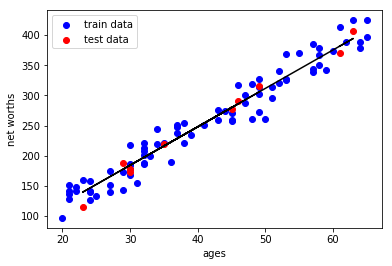

In [84]:
view_regression(ages_clean_train, net_worts_clean_train, ages_test, net_worths_test, pred)

### #7 Slope after cleaning

In [85]:
print("slope: ", reg.coef_[0][0])

slope:  6.368594806943665


### #8 What’s the new score when you use the regression to make predictions on the test set?

In [86]:
print("regresion score with outliers: ", reg.score(ages_test, net_worths_test))

regresion score with outliers:  0.983189455395532


## #2 Outliers in the Enron finance data

* get acquainted with some of the outliers in the Enron finance data
* learn if/how to remove them.

In [88]:
#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [137]:
### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../5_datasets_and_questions/final_project_dataset_unix.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

In [108]:
# also use the csv from the last units
df = pd.read_csv('../5_datasets_and_questions/final_project_datase.csv')
df = df[['name', 'salary', 'bonus']].fillna(0)
df.head(1), data[0]

(              name    salary      bonus
 0  ALLEN PHILLIP K  201955.0  4175000.0, array([365788., 600000.]))

In [103]:
df.shape, len(data)

((146, 2), 95)

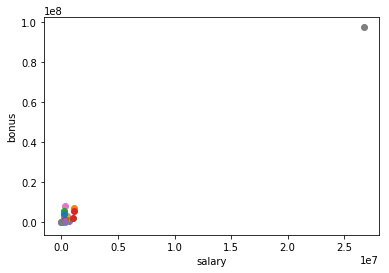

In [138]:
def enron_viz(data):
    for point in data:
        salary = point[0]
        bonus = point[1]
        plt.scatter( salary, bonus )

    plt.xlabel("salary")
    plt.ylabel("bonus")
    plt.show()
    
enron_viz(data)

### #1 What’s the name of the dictionary key of this data point? 

In [128]:
df.sort_values(by='bonus', ascending=False).iloc[:1]

,name,salary,bonus
130,TOTAL,26704229.0,97343619.0


In [127]:
# the total is an outlier
np.max(data)

97343619.0

### #2 Does this outlier seem like a data point that we should include when running machine learning on this dataset? Or should we remove it?

* Take it out, it's a spreadsheet quirk, the spreadsheet added up all the data points for us, and we need to take that "point" out.

### #3 Are all the outliers gone?

In [139]:
# remove the total data
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

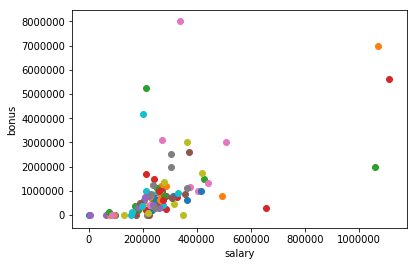

In [140]:
enron_viz(data)

We can see 4 more outliers, although none that are as waaaayyy out there as the last example (the "total" line).

### #4 Identifying two more outliers. What are the names associated with those points?

Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. 

In [141]:
df.sort_values(by='bonus', ascending=False).iloc[:5]

,name,salary,bonus
130,TOTAL,26704229.0,97343619.0
78,LAVORATO JOHN J,339288.0,8000000.0
79,LAY KENNETH L,1072321.0,7000000.0
122,SKILLING JEFFREY K,1111258.0,5600000.0
7,BELDEN TIMOTHY N,213999.0,5249999.0


In [142]:
df.query('salary > 1000000')

,name,salary,bonus
47,FREVERT MARK A,1060932.0,2000000.0
79,LAY KENNETH L,1072321.0,7000000.0
122,SKILLING JEFFREY K,1111258.0,5600000.0
130,TOTAL,26704229.0,97343619.0


LAY KENNETH L, SKILLING JEFFREY K

### #5 Would you guess that these are typos or weird spreadsheet lines that we should remove, or that there’s a meaningful reason why these points are different? (In other words, should they be removed before we, say, try to build a POI identifier?)

* They're two of Enron's biggest bosses, and definitely people of interest.